# Russian Car Plate Detection with OpenCV and TesseractOCR in Python

Author: Kenneth Leung  
Last updated: 28 Dec 2020

## Contents
- [Section 1 - Car Plate Detection with OpenCV and Haar Cascade](#section-1) 
- [Section 2 - Car Plate Number Recognition and Extraction with TesseractOCR](#section-2)  

___
<a name="section-1"></a>
## 1 - Car Plate Detection with OpenCV and Haar Cascade

#### Getting started with image preparation

In [24]:
video = cv2.VideoCapture('videos/BMW Car-to-X Communication, Traffic Light Assistant.mp4')
carplate_haar_cascade = cv2.CascadeClassifier('./haar_cascades/haarcascade_russian_plate_number.xml')

while (video.isOpened()):
    _,frame = video.read()
    frame1 = frame.copy()
    gray_frame= cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    number_plate = carplate_haar_cascade.detectMultiScale(gray_frame)
    for x,y,w,h in number_plate:
        cv2.rectangle(frame1,(x,y),(x+w,y+h),(0,255,0),2,)
    
    cv2.imshow('test',frame1)
    key = cv2.waitKey(1)
    if key == ord('q') or key == 27:
        break
video.release()      
cv2.destroyAllWindows()

In [2]:
# Import dependencies
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pytesseract

# Set tesseract path to where the tesseract exe file is located (Edit this path accordingly based on your own settings)
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [3]:
# Read car image and convert color to RGB
carplate_img = cv2.imread('./images/20180402113123_NumberPlate_Swift.jpg')
carplate_img_rgb = cv2.cvtColor(carplate_img, cv2.COLOR_BGR2RGB)

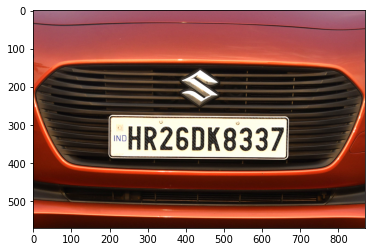

In [4]:
plt.imshow(carplate_img_rgb);

Image: "FAB Design!" by Niklas Emmerich Photography is licensed under CC BY-NC-SA 2.0

In [5]:
# Function to enlarge the plt display for user to view more clearly
def enlarge_plt_display(image, scale_factor):
    width = int(image.shape[1] * scale_factor / 100)
    height = int(image.shape[0] * scale_factor / 100)
    dim = (width, height)
    plt.figure(figsize = dim)
    plt.axis('off') 
    plt.imshow(image)

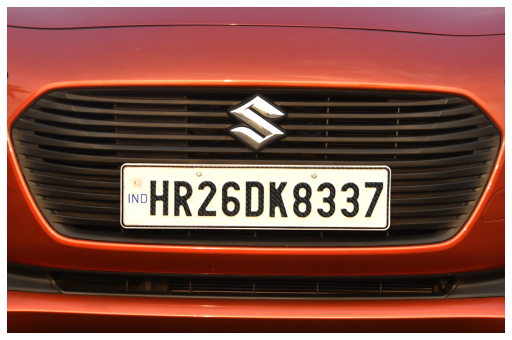

In [6]:
enlarge_plt_display(carplate_img_rgb, 1.2)

In [7]:
# Import Haar Cascade XML file for Russian car plate numbers
carplate_haar_cascade = cv2.CascadeClassifier('./haar_cascades/haarcascade_russian_plate_number.xml')

In [8]:
# Setup function to detect car plate
def carplate_detect(image):
    carplate_overlay = image.copy() # Create overlay to display red rectangle of detected car plate
    carplate_rects = carplate_haar_cascade.detectMultiScale(carplate_overlay,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        cv2.rectangle(carplate_overlay, (x,y), (x+w,y+h), (255,0,0), 5) 
        
    return carplate_overlay

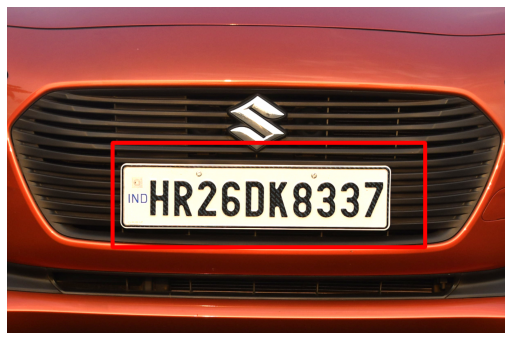

In [9]:
detected_carplate_img = carplate_detect(carplate_img_rgb)
enlarge_plt_display(detected_carplate_img, 1.2)

___
<a name="section-2"></a>
## 2 - Car Plate Number Recognition and Extraction with TesseractOCR

#### Extract car license plate

In [10]:
# Function to retrieve only the car plate sub-image itself
def carplate_extract(image):
    
    carplate_rects = carplate_haar_cascade.detectMultiScale(image,scaleFactor=1.1, minNeighbors=5) 

    for x,y,w,h in carplate_rects: 
        carplate_img = image[y+15:y+h-10 ,x+15:x+w-20] 
        
    return carplate_img

In [11]:
# Enlarge image for further image processing later on
def enlarge_img(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
    return resized_image

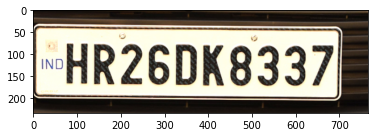

In [12]:
# Display extracted car license plate image
carplate_extract_img = carplate_extract(carplate_img_rgb)
carplate_extract_img = enlarge_img(carplate_extract_img, 150)
plt.imshow(carplate_extract_img);

#### Begin series of image processing to improve accuracy of TesseractOCR's results

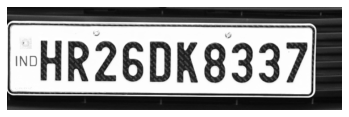

In [13]:
# Convert image to grayscale
carplate_extract_img_gray = cv2.cvtColor(carplate_extract_img, cv2.COLOR_RGB2GRAY)
plt.axis('off') 
plt.imshow(carplate_extract_img_gray, cmap = 'gray');

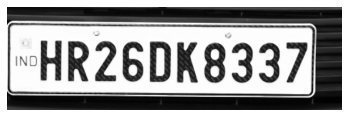

In [14]:
# Apply median blur + grayscale
carplate_extract_img_gray_blur = cv2.medianBlur(carplate_extract_img_gray,3) # Kernel size 3
plt.axis('off') 
plt.imshow(carplate_extract_img_gray_blur, cmap = 'gray');

In [15]:
# Display the text extracted from the car plate
print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                  config = f'--psm 8 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

 HR26DK83379



The printed text above does match with the number text in our image.

In [16]:
# Testing all PSM values
for i in range(3,14):
    print(f'PSM: {i}')
    print(pytesseract.image_to_string(carplate_extract_img_gray_blur, 
                                      config = f'--psm {i} --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'))

PSM: 3
~HR26DK8337

PSM: 4
~HR26DK8337

PSM: 5
~~
om
~o
co
Sa
=
co
~N
oc
x=

PSM: 6
~HR26DK8337

PSM: 7
~HR26DK8337

PSM: 8
 HR26DK83379

PSM: 9
~HR26DK8337|

PSM: 10
~HR26DK8337

PSM: 11

PSM: 12

PSM: 13
 HR26DK83379



___
### References
- https://docs.opencv.org/master/
- https://www.tutorialkart.com/opencv/python/
- https://nanonets.com/blog/ocr-with-tesseract
- https://tesseract-ocr.github.io/tessdoc/ImproveQuality.html